# chapter 01 - Python data model
- 데이터모델은 일종의 프레임워크로서, 시퀀스(sequence), 반복자(iterators), 함수(function), 클래스(class), 컨텍스트 관리자 등 언어 자체의 구성단위에 대한 인터페이스를 공식적으로 정의한다.  
- 파이썬은 특별 메소드(magic method)를 호출해서 기본적인 객체 연산을 수행한다.
- 특별 메소드는 __getitem__()처럼 '이중 언더바'를 가지고 있다.
- 읽을때는 *던더(dunder)-getitem*이라고 부른다. 던더는 더블 언더바(double underbar) 줄임말

## 1.1 카드 한 벌
아래 [예제 1-1]은 특별 메서드 __getitem__()과 __len__()만으로 괜찮은 기능을 구현할 수 있다는 것을 보여준다.
이 코드는 카드(스페이스, 다이아, 클로버, 하트) 한 벌을 나타내는 클래스 FrenchDeck이다.

In [1]:
import collections

In [19]:
Card = collections.namedtuple('Card',['rank','suit'])

class FrenchDeck:
    ranks = [str(n) for n in range(2,11)] + list('JQKA')
    # ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
    suits = 'spades diamonds clubs hearts'.split()
    # ['spades', 'diamonds', 'clubs', 'hearts']
    
    def __init__(self):
        self._cards = self._cards = [Card(rank,suit) for suit in self.suits 
                      for rank in self.ranks]
        
    def __len__(self):
        return len(self._cards)
    
    def __getitem__(self, position):
        return self._cards[position]

In [21]:
beer_card = Card('7','diamonds')
beer_card

Card(rank='7', suit='diamonds')

In [17]:
ranks = [str(n) for n in range(2,11)] + list('JQKA')
suits = 'spades diamonds clubs hearts'.split()
_cards = [Card(rank,suit) for suit in suits 
                      for rank in ranks]

In [15]:
# [Card(rank,suit) for rank in ranks 
#                       for suit in suits]

FrenchDeck() 클래스는 __len 메서드를 정의해 줌으로써 len()함수를 통해 카드 개수를 반환한다.

In [22]:
deck = FrenchDeck()
len(deck)

52

또한 __getitem 메서드를 통해, obj[key] 형태로 특정 카드를 읽을 수 있다.
예를 들어 deck[0]은 첫번째 카드이고, deck[-1]은 마지막 카드이다.

In [24]:
print(deck[0])
print(deck[-1])

Card(rank='2', suit='spades')
Card(rank='A', suit='hearts')


이렇듯, 특별 메서드를 통해 파이썬 데이터 모델을 사용할 때 2가지 장점이 있다.
- 첫째, 사용자가 표준 연산을 수행하기 위해 클래스 자체에서 구현한 임의 메서드명을 암기할 필요없다.
- 둘째, 파이썬 표준 라이브러리에서 제공하는 기능을 별도로 구현할 필요 없이 바로 사용할 수 있다.

__getitem()메서드는 self._cards를 호출하므로, 슬라이싱(slicing)도 가능하다

In [25]:
print(deck[:3])
print(deck[12::13])

[Card(rank='2', suit='spades'), Card(rank='3', suit='spades'), Card(rank='4', suit='spades')]
[Card(rank='A', suit='spades'), Card(rank='A', suit='diamonds'), Card(rank='A', suit='clubs'), Card(rank='A', suit='hearts')]


In [26]:
for card in deck[:10]:
    print(card)

Card(rank='2', suit='spades')
Card(rank='3', suit='spades')
Card(rank='4', suit='spades')
Card(rank='5', suit='spades')
Card(rank='6', suit='spades')
Card(rank='7', suit='spades')
Card(rank='8', suit='spades')
Card(rank='9', suit='spades')
Card(rank='10', suit='spades')
Card(rank='J', suit='spades')


In [28]:
for card in reversed(deck[:10]):
    print(card.rank)

J
10
9
8
7
6
5
4
3
2


In [29]:
Card('Q','hearts') in deck

True

In [30]:
Card('1','hearts') in deck

False

In [40]:
suit_val = dict(spades = 3, hearts = 2, diamonds=1, clubs=0)

def spades_high(card):
    rank_val = FrenchDeck.ranks.index(card.rank)
    result = rank_val * len(suit_val) + suit_val[card.suit]
    return result

for card in sorted(deck, key=spades_high)[:10]:
    print(card)

Card(rank='2', suit='clubs')
Card(rank='2', suit='diamonds')
Card(rank='2', suit='hearts')
Card(rank='2', suit='spades')
Card(rank='3', suit='clubs')
Card(rank='3', suit='diamonds')
Card(rank='3', suit='hearts')
Card(rank='3', suit='spades')
Card(rank='4', suit='clubs')
Card(rank='4', suit='diamonds')


FrenchDeck 클래스에 __len__()과 __getitem__() 특별 메서드를 구현함으로써 FrenchDeck은 마치 파이썬 시퀀스(ex.list)처럼 작동하므로 반복/슬라이싱이 가능하다.

In [37]:
FrenchDeck.ranks.index(card.rank)

0

# 1.2 특별 메서드는 어떻게 사용되나?
- 파이썬 코드는 my_obj.__len__()으로 직접 호출하지 않고, len(my_obj) 형태로 호출한다. 
- list, str, bytearray 등과 같은 내장 자료형의 경우 파이썬은 위와 같은 형태로 호출한다.
- 특별 메서드는 종종 암묵적으로 호출된다. 무슨말이냐? 예를 들어 for i in x: 문의 경우 실제로 iter(x)를 호출하며 이 함수는 다시 x.__iter__()를 호출한다.
- 특별 메서드를 호춯해야 하는 경우, 일반적으로 내장함수를 호출하는 것이 좋다. 내장함수가 해당 특별 메서드를 호출하기 때문이다.     

각 클래스의 특별 메서드를 어떻게 확인하나?  
**dir(myclass)**를 이용해서 해당 클래스의 특별 메서드를 확인할 수 있다.

In [41]:
class myclass:
    pass

print(dir(myclass))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__']


## 1.2.1 수치형
아래 그림처럼 2차원 벡터를 나타내는 클래스를 구현해 특별 메서드를 사용하는 방법을 알아보자
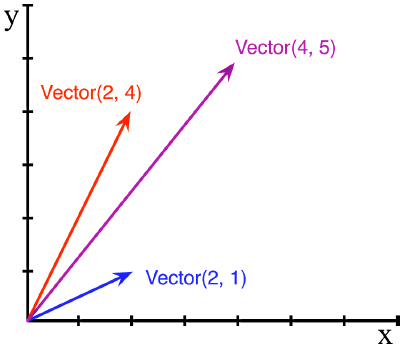

[예제 1-2]는 __repr__(), __abs__(), __add__(), __mul__() 특별 메소드를 이용해서 Vector 클래스를 구현한 코드이다.

In [60]:
from math import hypot
#  https://docs.python.org/3/library/math.html#math.hypot

class Vector:
    def __init__(self, x=0, y=0):
        self.x=x
        self.y=y
        
    def __repr__(self):
        return 'Vector(%r, %r)' % (self.x, self.y)
    
    def __abs__(self):
        return hypot(self.x, self.y)
    
    def __bool__(self):
        return bool(abs(self))
    
    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Vector(x,y)
    
    def __mul__(self, scalar):
        return Vector(self.x * scalar, self.y * scalar)

In [63]:
v1 = Vector(2,4)
v2 = Vector(2,1)
v3 = Vector(3,4)

print('add 호출 : ', v1+v2)
print('abs 호출 : ', abs(v3))
print('mul 호출 : ', v3*3)
print('mul 및 abs 호출 : ', abs(v3*3))

add 호출 :  Vector(4, 5)
abs 호출 :  5.0
mul 호출 :  Vector(9, 12)
mul 및 abs 호출 :  15.0


## 1.2.2 문자열 표현
__repr__() 특별 메서드는 객체를 문자열로 표현하기 위해 repr() 내장 함수에 의해 호출된다. 
__str__()과 다른점은 'print()'함수를 써야만 호출된다. 

아래의 Vector2는 repr대신 str() 특별 메서드를 사용한 클래스이다. 이 클래스를 이용해서 객체를 만들면, print()를 호출할 때 문자열로 출력된다.

In [64]:
class Vector2:
    
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
        
    def __str__(self):
        return 'Vector(%r, %r)' % (self.x, self.y)
    
    def __abs__(self):
        return hypot(self.x ,self.y)
    
    def __bool__(self):
        return bool(abs(self))
    
    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Vector(x, y)
    
    def __mul__(self, scalar):
        return Vector(self.x * scalar, self.y * scalar)

In [66]:
v4 = Vector2(3,4)
v4

In [67]:
print(v4)

Vector(3, 4)


## 1.2.3 사용자 정의형 boolen 값
- x 가 참인지 거짓인지 판단할 수 있다. True , False를 반환한다.
- 위의 예제 [1-2]의 Vector클래스에서의 __bool__()은 벡터 크기(abs(self))가 0이면 False, 아니면 True를 반환한다.

In [69]:
v5 = Vector()
bool(v5)

False

In [70]:
v6 = Vector(1, 1)
bool(v6)

True

# 1.3 특별 메서드 개요
파이썬 언어 참조 문서의 ['Data Model'](https://docs.python.org/3.5/reference/datamodel.html)에서는 83개의 특별 메서드를 설명한다. 

# 1.5 요약
특별 메서드를 구현하면 사용자가 정의한 클래스의 객체도 내장형 객체처럼 작동할 수 있어, 파이썬스러운 코딩 스타일을 구사할 수 있다.

# +)더 알기
### collections.namedtuple
- 말 그대로 튜플의 성질을 가졌지만 항목에 이름으로 접근가능하다.
- 본래 튜플은 인덱스(index)로 접근하기 때문에 직관적이지 않다.
- mytuple[0], mytuple[1], .. 이렇게 하면 0번째, 1번째 항목에 대한 정보를 구체적으로 알 수 없다.
- 하지만 네임드튜플은 mytuple.age, mytuple.birth처럼 사용자가 항목에 이름을 붙여 사용할 수 있다.
- 물론 인덱스로도 사용가능

In [6]:
from collections import namedtuple
biz_card = namedtuple("biz_card", ['name','age','phone_num'])
# namedtuple을 사용할 때 변수 이름을 클래스 이름과 통일시키는 것이 깰꼼
# namedtuple 함수가 반환하는 값은 클래스다. "biz_card"이름을 가진 biz_card클래스 만들어 진다.
# biz_card클래스는 3개의 속성을 갖는다. 
bcard_john = biz_card('john',30,'010-111-1111')
print(bcard_john.name)
print(bcard_john.age)
print(bcard_john.phone_num)
print('---------------------')
print(bcard_john[0])
print(bcard_john[1])
print(bcard_john[2])

john
30
010-111-1111
---------------------
john
30
010-111-1111
